Objective is to implement the original cats, no cat exercise completed in numpy with keras.

Use a fully connected layer and an output layer to classify the images.

Experiment with different optimizers and their parameters.

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image

from keras.layers import Dense, Flatten
from keras import Sequential
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
# Loading the data (cat/non-cat)
# train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

# Loading the data (cat/non-cat)
train_dataset = h5py.File('./train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

test_dataset = h5py.File('./test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

y = [1], it's a 'cat' picture.


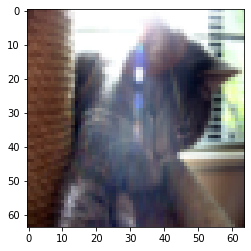

In [3]:
# Example of a picture
index = 42
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [4]:
#summary of input dimensions

print('X_train: {}' .format(train_set_x_orig.shape))
print('Y_train: {}' .format(test_set_x_orig.shape))

print('X_test: {}' .format(train_set_y_orig.shape))
print('Y_test: {}' .format(test_set_y_orig.shape))

X_train: (209, 64, 64, 3)
Y_train: (50, 64, 64, 3)
X_test: (209,)
Y_test: (50,)


In [5]:
X_train = train_set_x_orig.copy()/255
X_test = test_set_x_orig.copy()/255
Y_train = to_categorical(train_set_y_orig.copy())
Y_test = to_categorical(test_set_y_orig.copy())

In [6]:
m_train = X_train.shape[0]
n_pix = X_train.shape[1]
n_chan = X_train.shape[3]

In [7]:
print(Y_train[0:7, :])

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [8]:
#define a keras sequence
model = Sequential([
    Flatten(input_shape=(n_pix, n_pix, n_chan)),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

W0810 00:27:16.139137 4593481152 deprecation_wrapper.py:119] From /Users/ns/anaconda3/envs/ai-bootcamp/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 00:27:16.178112 4593481152 deprecation_wrapper.py:119] From /Users/ns/anaconda3/envs/ai-bootcamp/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 00:27:16.191157 4593481152 deprecation_wrapper.py:119] From /Users/ns/anaconda3/envs/ai-bootcamp/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [9]:
#compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0810 00:27:18.879043 4593481152 deprecation_wrapper.py:119] From /Users/ns/anaconda3/envs/ai-bootcamp/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0810 00:27:18.908013 4593481152 deprecation_wrapper.py:119] From /Users/ns/anaconda3/envs/ai-bootcamp/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
#show model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                393248    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 393,314
Trainable params: 393,314
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model with X_train
model.fit(X_train, Y_train, batch_size=32, epochs=1)

W0810 00:27:24.057456 4593481152 deprecation.py:323] From /Users/ns/anaconda3/envs/ai-bootcamp/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0810 00:27:24.116929 4593481152 deprecation_wrapper.py:119] From /Users/ns/anaconda3/envs/ai-bootcamp/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/1
